In [12]:
import random
import numpy as np
import  matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import seaborn as sns
import torch




In [13]:
train_data_number = 500

train_x_mean = 0
test_x_mean = 10

train_x_var = 1
test_x_var = 10


In [14]:
x = np.zeros((train_data_number,1))
train_x_pdf_on_train_dist = np.zeros((train_data_number))
train_x_pdf_on_test_dist = np.zeros((train_data_number))
for i in range(train_data_number):
    a=np.random.normal(loc=train_x_mean, scale=train_x_var, size=None)
    x[i,0] = a
    
    pdf = norm.pdf(a, train_x_mean, train_x_var)
    train_x_pdf_on_train_dist[i] = pdf
    
    pdf = norm.pdf(a, test_x_mean, test_x_var)
    train_x_pdf_on_test_dist[i] = pdf
train_x_weight = train_x_pdf_on_train_dist/train_x_pdf_on_test_dist


<AxesSubplot:ylabel='Density'>

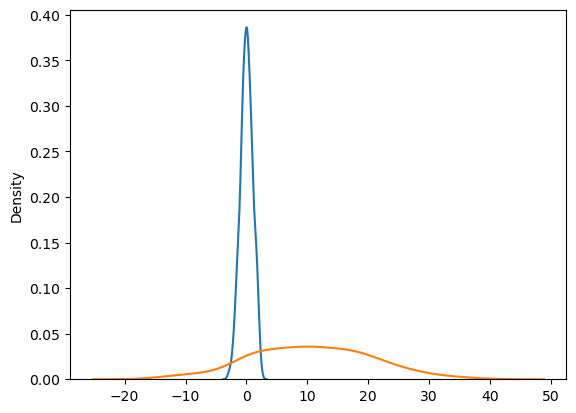

In [16]:
sns.kdeplot(x.reshape(500))
sns.kdeplot(x_test.reshape(500))




In [24]:

def qudratic_form(x,y):
    return y**3 - 2*y**2*x - 3*y*x**2 - 4*y**2 + 5*y*x + 6*y

def p_y_given_x(x,y):
    v = qudratic_form(x,y)
    
    return np.exp(v)

def dist_of_y(x,prior_p0=0.5, prior_p1 = 0.5):
    v0 = qudratic_form(x,0) * prior_p0
    v1 = qudratic_form(x,1) * prior_p1
    sum_v = v0 + v1
    p0 = v0/sum_v
    p1 = v1/sum_v
    return [p0,p1]

def get_y(p):
    return np.random.choice(2, 1, p=[p[0][0],p[1][0]])[0]


In [18]:
def gradient(meanY,Y,x):
#     emp
    y3_emp = Y**3
    y2x_emp = Y**2*x
    yx2_emp = Y*x**2
    y2_emp = Y**2
    yx_emp = Y*x
    y_emp = Y
#     exp
    y3_exp = meanY**3
    y2x_exp = meanY**2*x
    yx2_exp = meanY*x**2
    y2_exp = meanY**2
    yx_exp = meanY*x
    y_exp = meanY
    
    
    emp = torch.cat([y3_emp,y2x_emp,yx2_emp,y2_emp,yx_emp,y_emp],axis = 1)
    exp = torch.cat([y3_exp,y2x_exp,yx2_exp,y2_exp,yx_exp,y_exp],axis = 1)
    
    grad = torch.mean(exp, 0) - torch.mean(emp, 0) 
    return torch.reshape(grad, (d + 2, 1))
    
    
    
    
    
    

In [19]:
def predict_regression(weight,M,x,prior_p0 = 0.5, prior_p1 = 0.5):
    
    # v0
    Y = 0
    p0 = torch.exp(-weight *  (M[0]*Y**3 + M[1]* Y**2*x  + M[2] * Y*x**2 + M[3] * Y**2 + M[4] * Y*x + M[5]*Y )) * 0.5
    
    Y = 1
    f1 = torch.exp(0.5 * 1 * 1 * 1 + 1 * 1 * 0.5)
    p1 = torch.exp(-weight *  (M[0]*Y**3 + M[1]* Y**2*x  + M[2] * Y*x**2 + M[3] * Y**2 + M[4] * Y*x + M[5]*Y )) * 0.5
    
    meanY = get_y(p)
    
    return meanY
    
    
    
    

In [25]:
# sample train y
y = []
for x0 in x:
    dist = dist_of_y(x0)
    y.append(get_y(dist))

y = np.array(y)


In [26]:
# sample test y
y_test = []
for x0 in x_test:
    dist = dist_of_y(x0)
    y_test.append(get_y(dist))

y_test = np.array(y_test)

In [27]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy.stats import norm,multivariate_normal

import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# from random import shuffle
from sklearn.utils import shuffle

from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
import argparse
from sklearn.utils import shuffle
from ope_v4 import *


class WEIGHT_DATA_SET(data.Dataset):
    '''
    dataset class with instance weight
    '''

    def __init__(self, data, reward, weights):
        '''
        weights are same dimensional witi original data
        '''
        self.data = torch.tensor(data)
        self.reward = torch.tensor(reward)
        self.weights = torch.tensor(weights)

    def __getitem__(self, index):
        img = self.data[index]
        target = self.reward[index]
        weight = self.weights[index]
        return img, target, weight

    def __len__(self):
        return len(self.data)


def train_robust_regression(x, y, weight, lr1, lr2,mylambda = 0):
    weight_st = my_bound(weight)
    weighted_train = WEIGHT_DATA_SET(x, y, weight)

    train_model = Net(2, 2, 1)

    validate_size = int(0.1 * 500)
    validate_loader = data.DataLoader(data.Subset(weighted_train, range(0, validate_size)),
                                      batch_size=64, shuffle=True)
    # 10% validation set
    train_loader = data.DataLoader(data.Subset(weighted_train, range(validate_size, 450)),
                                   batch_size=64, shuffle=True, )

    train_model, M = train_validate_test(args, args.lr_robust, 400, "regression", 'cpu', 'False',
                                                         train_model,
                                                         train_loader, None, validate_loader, 1, 0.000,
                                                         d=2, testflag=False, lr1=lr1, lr2=lr2, mylambda = mylambda)

    return train_model, M


def predict_regression(weight,M,x,prior_p0 = 0.5, prior_p1 = 0.5):
    
    # v0
    Y = 0
    p0 = torch.exp(-weight *  (M[0]*Y**3 + M[1]* Y**2*x  + M[2] * Y*x**2 + M[3] * Y**2 + M[4] * Y*x + M[5]*Y )) * 0.5
    
    Y = 1
    f1 = torch.exp(0.5 * 1 * 1 * 1 + 1 * 1 * 0.5)
    p1 = torch.exp(-weight *  (M[0]*Y**3 + M[1]* Y**2*x  + M[2] * Y*x**2 + M[3] * Y**2 + M[4] * Y*x + M[5]*Y )) * 0.5
    
    meanY = get_y(p)
    
    return meanY
    
    
    

# mylambda = torch.tensor([0,0.1,0.3,0]).reshape((4,1))
# # mylambda = torch.tensor([0,0,0.0,0]).reshape((4,1))

for lr in [2,1,0.5,0.1]:
    
    model, M = train_robust_regression(x, y, train_x_weight , lr, lr)

    prediction = []
    for i in range(len(x_test)):
        predy = predict_regression(test_x_weight[i],M,x_test[i], )

    # prediction = np.array(prediction)
    # print(np.mean((prediction-y_test)**2))
    print(np.mean((predy-y_test)**2))

ValueError: probabilities contain NaN